## Stock Price Predictor

Deep learning is shaping modern quantitive financial field. There are many different neural networks can be applied to stock price prediction problems. The challenge here is to try to predict the future closing value of a given stock across a given period of time in the future.  Long Short Term Memory networks , it is the recurrent neural network and it outperforms others architecture since it can take advantage of predicting time series (or sequentially) . It usually called “LSTMs” here is used to predict the closing price of the stock using a dataset of past prices . 

In [1]:
!pip install --upgrade pip
!pip install plotly==4.5.0
!pip install dask==2020.12.0
!pip install widgetsnbextension==3.0.0
!pip install jsonschema==3.0.1
!pip install --upgrade tensorflow==2.3.2
!pip install numpy==1.17.5
!pip show tensorflow

    100% |████████████████████████████████| 1.5MB 7.9MB/s eta 0:00:01    93% |██████████████████████████████  | 1.4MB 11.6MB/s eta 0:00:01
  Found existing installation: pip 18.1
    Uninstalling pip-18.1:
      Successfully uninstalled pip-18.1
     |████████████████████████████████| 7.1 MB 5.3 MB/s eta 0:00:0102     |█████████▉                      | 2.2 MB 5.3 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=9566 sha256=f9cdbd2c273e12c6f9474a97af18790dfa77b1f9da689e2b2945c2f960faaa22
  Stored in directory: /root/.cache/pip/wheels/ac/cb/8a/b27bf6323e2f4c462dcbf77d70b7c5e7868a7fbe12871770cf
Successfully built retrying
  Attempting uninstall: plotly
    Found existing installation: plotly 2.0.15
    Uninstalling plotly-2.0.15:
      Successfully uninstalled plotly-2.0.15
     |████████████████████████████████| 884 kB 5.5 MB/s eta 0:00:01
  Attempting uninstall: dask
    Found existing installation: dask 0.16.1
    Uninstalling dask-0.16.1:
  

      Successfully uninstalled widgetsnbextension-3.1.0
     |████████████████████████████████| 54 kB 2.4 MB/s eta 0:00:011
  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-2.6.0:
      Successfully uninstalled jsonschema-2.6.0


     |███████████████████▉            | 199.0 MB 21.0 MB/s eta 0:00:06  |                                | 808 kB 5.1 MB/s eta 0:01:03     |▏                               | 2.1 MB 5.1 MB/s eta 0:01:03     |▍                               | 4.1 MB 5.1 MB/s eta 0:01:02     |▌                               | 5.3 MB 5.1 MB/s eta 0:01:02     |▊                               | 7.8 MB 5.1 MB/s eta 0:01:01     |▉                               | 8.4 MB 5.1 MB/s eta 0:01:01     |█                               | 9.2 MB 5.1 MB/s eta 0:01:01     |█                               | 10.4 MB 5.1 MB/s eta 0:01:01     |█▏                              | 11.6 MB 5.1 MB/s eta 0:01:01     |█▍                              | 14.0 MB 5.1 MB/s eta 0:01:00     |██                              | 20.8 MB 23.7 MB/s eta 0:00:13     |██▏                             | 21.9 MB 23.7 MB/s eta 0:00:13     |██▍                             | 24.2 MB 23.7 MB/s eta 0:00:13     |██▌                             | 25.3 MB 23.7 

     |████████████████████████████████| 2.9 MB 12.4 MB/s eta 0:00:01     |███████████████████▏            | 1.7 MB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 20.1 MB 10.8 MB/s eta 0:00:01    |██▍                             | 1.5 MB 10.8 MB/s eta 0:00:02     |████▋                           | 2.9 MB 10.8 MB/s eta 0:00:02     |███████                         | 4.4 MB 10.8 MB/s eta 0:00:02�████                       | 5.7 MB 10.8 MB/s eta 0:00:02     |███████████▍                    | 7.1 MB 10.8 MB/s eta 0:00:02     |█████████████▊                  | 8.7 MB 10.8 MB/s eta 0:00:02     |██████████████████▌             | 11.7 MB 10.8 MB/s eta 0:00:01     |█████████████████████████▌      | 16.1 MB 10.8 MB/s eta 0:00:01     |██████████████████████████████  | 18.9 MB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 14.7 MB/s eta 0:00:01    |█                               | 348 kB 14.7 MB/s eta 0:00:01     |██████▏                         | 2.0 MB 14.7 M

    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
Name: tensorflow
Version: 2.3.2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/conda/lib/python3.6/site-packages
Requires: gast, h5py, google-pasta, keras-preprocessing, tensorflow-estimator, grpcio, protobuf, astunparse, numpy, termcolor, wrapt, wheel, six, opt-einsum, absl-py, tensorboard
Required-by: 


### Load Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [4]:
from util_LSTM import *

### Load and Inspect dataset

In [5]:
#Read in more stocks 
#symbols = ['GOOG', 'AAPL', 'GLD', 'XOM']
ticker = ['AAPL']

start_date = dt.datetime(2000,1,1)
end_date = dt.datetime(2021,1,1)
dates = pd.date_range(start_date, end_date)
prices_all = get_data(ticker, dates)

In [6]:
prices_all.head()

,SPY,AAPL
2000-01-03,98.146072,0.862169
2000-01-04,94.307983,0.789480
2000-01-05,94.476685,0.801032
2000-01-06,92.958336,0.731712
2000-01-07,98.356987,0.766373


In [7]:
ticker[0]

'AAPL'

In [8]:
prices_all = prices_all.rename(columns={ticker[0]:'AdjClose'})
print(prices_all)

                   SPY    AdjClose
2000-01-03   98.146072    0.862169
2000-01-04   94.307983    0.789480
2000-01-05   94.476685    0.801032
2000-01-06   92.958336    0.731712
2000-01-07   98.356987    0.766373
2000-01-10   98.694397    0.752894
2000-01-11   97.513435    0.714383
2000-01-12   96.543373    0.671539
2000-01-13   97.850876    0.745191
2000-01-14   99.179451    0.773593
2000-01-18   98.399147    0.800551
2000-01-19   99.200493    0.820770
2000-01-20   97.682137    0.874204
2000-01-21   97.471199    0.857355
2000-01-24   94.708679    0.818363
2000-01-25   95.784187    0.864576
2000-01-26   95.024994    0.848690
2000-01-27   94.645409    0.847246
2000-01-28   91.692978    0.782740
2000-01-31   94.181450    0.799107
2000-02-01   95.109352    0.772149
2000-02-02   95.193726    0.761077
2000-02-03   96.627693    0.795738
2000-02-04   96.227066    0.831842
2000-02-07   96.079422    0.878536
2000-02-08   97.386887    0.884795
2000-02-09   95.341301    0.867464
2000-02-10   95.5311

In [9]:
prices_all = prices_all[['AdjClose']]
prices_all.values

array([[  0.86216921],
       [  0.78947967],
       [  0.80103225],
       ...,
       [134.86999512],
       [133.72000122],
       [132.69000244]])

In [10]:
stock_arry = prices_all.values
stock_arry = stock_arry.astype('float32')

In [11]:
stock_arry

array([[  0.8621692 ],
       [  0.7894797 ],
       [  0.80103225],
       ...,
       [134.87      ],
       [133.72      ],
       [132.69      ]], dtype=float32)

In [12]:
# Using MinMaxScaler to rescale data in the range of 0-to-1 
# since Neural networks are sensitive to input data, especiallly to sigmoid /tanh activation functions

scaler = MinMaxScaler(feature_range=(0, 1))
norm_stock_arry = scaler.fit_transform(stock_arry)

#featureRange_0To1 =True #Boolean value to determine if we want to use feature scale from 0 to 1
#norm_stock_df= normalised_MinMaxScaler(stock_df,featureRange_0To1)

In [13]:
norm_stock_arry

array([[0.00483605],
       [0.00430348],
       [0.00438812],
       ...,
       [0.9866654 ],
       [0.97823983],
       [0.97069335]], dtype=float32)

### Data Pre-processing

In [14]:
# Divide stock data in test and train dataframes such that 80% for traing and 20% testing
train, test = get_train_test(norm_stock_arry,0.67)
# The shape of the train and test sets.
print (train.shape, test.shape)
print(len(train), len(test))

(3540, 1) (1744, 1)
3540 1744


In [15]:
print(train)
print("******************")
print(test)

[[0.00483605]
 [0.00430348]
 [0.00438812]
 ...
 [0.12703457]
 [0.11676273]
 [0.11542037]]
******************
[[0.1151939 ]
 [0.11538537]
 [0.11560244]
 ...
 [0.9866654 ]
 [0.97823983]
 [0.97069335]]


testing_df = pd.DataFrame([1, 2, 3, 4, 5, 6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], columns=list('P'))
testing_array = testing_df['P'].values
testing_array

#Make the time  step of 30days
R, S= add_timesteps(testing_df[['P']], testing_df.P, 3)
print(R)
print(S)

L,M = create_dataset(testing_array,3)
print(L)
print(M)

In [16]:
look_back = 10
trainX, trainY = make_data_matrix(train, look_back)
testX, testY = make_data_matrix(test, look_back)

In [17]:
trainX.shape

(3529, 10)

In [18]:
trainY.shape

(3529,)

In [19]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [20]:
trainX.shape

(3529, 1, 10)

In [21]:
trainY.shape

(3529,)

### Build LSTM Model

In [22]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=256, verbose=2)

Epoch 1/100
14/14 - 0s - loss: 0.0070
Epoch 2/100
14/14 - 0s - loss: 0.0050
Epoch 3/100
14/14 - 0s - loss: 0.0039
Epoch 4/100
14/14 - 0s - loss: 0.0035
Epoch 5/100
14/14 - 0s - loss: 0.0032
Epoch 6/100
14/14 - 0s - loss: 0.0030
Epoch 7/100
14/14 - 0s - loss: 0.0027
Epoch 8/100
14/14 - 0s - loss: 0.0025
Epoch 9/100
14/14 - 0s - loss: 0.0022
Epoch 10/100
14/14 - 0s - loss: 0.0019
Epoch 11/100
14/14 - 0s - loss: 0.0016
Epoch 12/100
14/14 - 0s - loss: 0.0013
Epoch 13/100
14/14 - 0s - loss: 0.0011
Epoch 14/100
14/14 - 0s - loss: 7.8862e-04
Epoch 15/100
14/14 - 0s - loss: 5.5667e-04
Epoch 16/100
14/14 - 0s - loss: 3.6451e-04
Epoch 17/100
14/14 - 0s - loss: 2.2151e-04
Epoch 18/100
14/14 - 0s - loss: 1.2564e-04
Epoch 19/100
14/14 - 0s - loss: 6.9586e-05
Epoch 20/100
14/14 - 0s - loss: 3.9893e-05
Epoch 21/100
14/14 - 0s - loss: 2.6895e-05
Epoch 22/100
14/14 - 0s - loss: 2.1806e-05
Epoch 23/100
14/14 - 0s - loss: 2.0179e-05
Epoch 24/100
14/14 - 0s - loss: 1.9619e-05
Epoch 25/100
14/14 - 0s - los

In [23]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

In [24]:
train_predict = scaler.inverse_transform(train_predict)
trainY = scaler.inverse_transform([trainY])
test_predict = scaler.inverse_transform(test_predict)
testY = scaler.inverse_transform([testY])

In [25]:
trainScore = math.sqrt(mean_squared_error(trainY[0], train_predict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], test_predict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.38 RMSE
Test Score: 5.46 RMSE


In [26]:
# shift train predictions for plotting
plot_train_predict = np.empty_like(norm_stock_arry)
plot_train_predict[:, :] = np.nan
plot_train_predict[look_back:len(train_predict) + look_back, :] = train_predict

In [27]:
# shift test predictions for plotting
plot_test_predict = np.empty_like(norm_stock_arry)
plot_test_predict[:, :] = np.nan
plot_test_predict[len(train_predict)+look_back*2 + 1 : len(norm_stock_arry)-1, :] = test_predict

### Visualize the Prediction

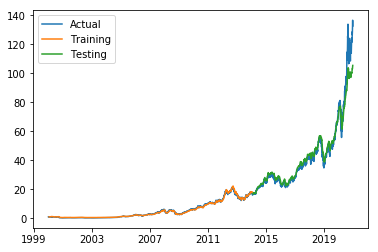

In [28]:
plt.plot(prices_all['AdjClose'], label='Actual')
plt.plot(pd.DataFrame(plot_train_predict, columns=["AdjClose"], index=prices_all.index).AdjClose, label='Training')
plt.plot(pd.DataFrame(plot_test_predict, columns=["AdjClose"], index=prices_all.index).AdjClose, label='Testing')
plt.legend(loc='best')
plt.show()